In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import json


In [2]:
df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df['Length1'].isna().sum()

0

In [6]:
df['Length2'].isna().sum()

0

In [7]:
df['Length3'].isna().sum()

0

In [8]:
df['Height'].isna().sum()

0

In [9]:
df['Width'].isna().sum()

0

In [10]:
df['Species'].isna().sum()

0

In [11]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
df =pd.get_dummies(df, columns=['Species'])
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


<AxesSubplot:>

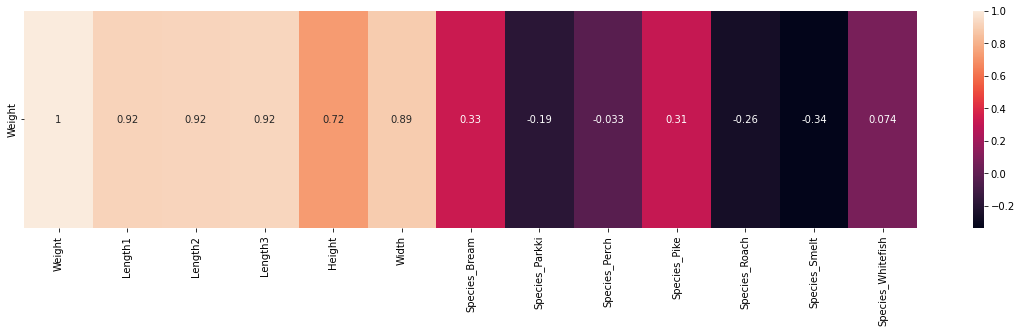

In [13]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr().T.head(1),annot=True)

In [14]:
x = df.drop('Weight',axis=1)
y = df['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [16]:
lin_reg_model = LinearRegression()
lin_reg_model

LinearRegression()

In [17]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

# Testing results

In [18]:
y_pred = lin_reg_model.predict(x_test)  #testing

mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r_squared = r2_score(y_test,y_pred)
print("r2:",r_squared)


MSE: 18097.19529507801
RMSE: 134.52581646315332
MAE: 93.9670167075161
r2: 0.9033695629310663


# Training results

In [19]:
y_pred_train = lin_reg_model.predict(x_train)  #testing

mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r_squared = r2_score(y_train,y_pred_train)
print("r2:",r_squared)


MSE: 6148.565075312088
RMSE: 78.4127864274194
MAE: 56.759082711724496
r2: 0.9410813172480663


# Normality of residual

In [20]:
residual = y_train - y_pred_train
residual

1     -33.923189
122   -34.168373
150    21.281422
17     99.155530
84      3.223007
         ...    
129   -12.545079
156   -21.199652
145    82.230160
87    -29.270518
131   -60.021130
Name: Weight, Length: 127, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

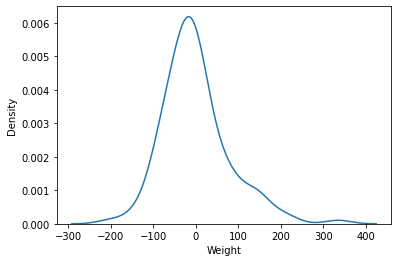

In [21]:
sns.kdeplot(residual)

In [22]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Length1'>

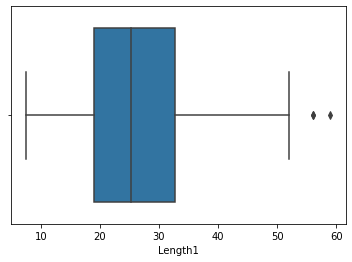

In [23]:
sns.boxplot(x = df['Length1'])

<AxesSubplot:xlabel='Length2'>

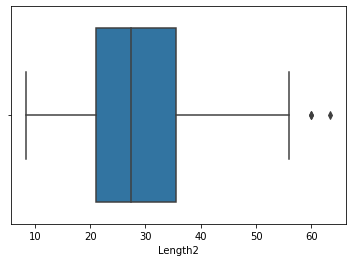

In [24]:
sns.boxplot(x = df['Length2'])

<AxesSubplot:xlabel='Length3'>

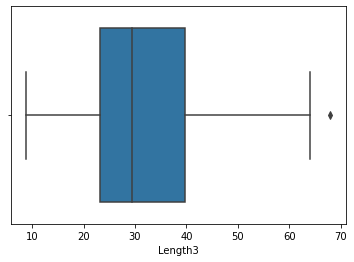

In [25]:
sns.boxplot(x = df['Length3'])

<AxesSubplot:xlabel='Height'>

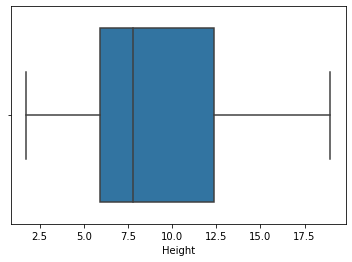

In [26]:
sns.boxplot(x = df['Height'])

<AxesSubplot:xlabel='Width'>

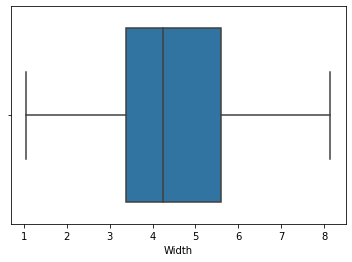

In [27]:
sns.boxplot(x = df['Width'])

<AxesSubplot:xlabel='Weight'>

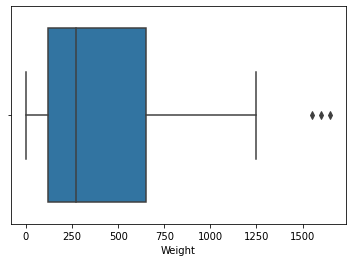

In [28]:
sns.boxplot(x = df['Weight'])

In [29]:
from scipy.stats import shapiro,kstest,normaltest


In [30]:
_,p_val = shapiro(residual)
print(p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

1.9726767277461477e-05
Data is not normally distributed


In [31]:
_,p_val = kstest(residual,'norm')
print(p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

8.955317183703491e-37
Data is not normally distributed


In [32]:
_,p_val = normaltest(residual)
print(p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

4.552552309787427e-07
Data is not normally distributed


In [33]:
import statsmodels.api as sm

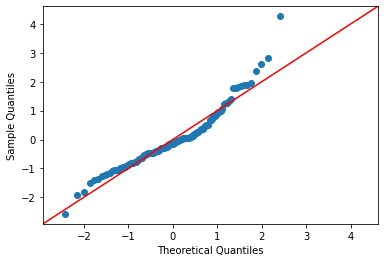

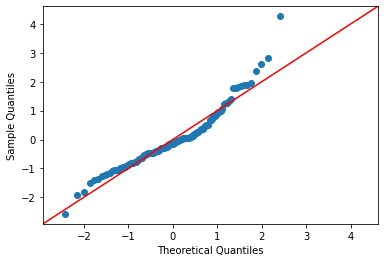

In [34]:
sm.qqplot(residual,line ='45',fit = True)

# Homoscedascity

<AxesSubplot:xlabel='Weight', ylabel='Weight'>

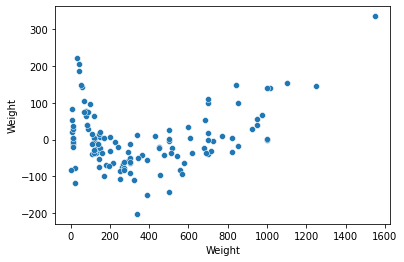

In [35]:
sns.scatterplot(x=y_train,y=residual)

# Testing on single row

In [36]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [37]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [38]:
Length1 = 26
Length2 = 29 
Length3 = 34
Height = 12.3
Width = 4.45
Species = 'Species_' + 'Smelt' #Species_Smelt
# Species

In [39]:
Length1,Length2,Length3,Height,Width,Species

(26, 29, 34, 12.3, 4.45, 'Species_Smelt')

In [40]:
columns = x.columns
species_index = np.where(columns == Species)

array = np.zeros(len(x.columns))

array[0] = Length1
array[1] = Length2
array[2] = Length3
array[3] = Height
array[4] = Width
array[species_index] = 1


In [41]:
array

array([26.  , 29.  , 34.  , 12.3 ,  4.45,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ])

In [42]:
y_pred = lin_reg_model.predict([array])
y_pred

C:\Users\Manjusha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([957.93816897])

In [43]:
with open ("linear_reg_model.pkl",'wb') as f:
    pickle.dump(lin_reg_model,f)

In [44]:
project_data = {'columns' : list(x.columns)}
project_data

{'columns': ['Length1',
  'Length2',
  'Length3',
  'Height',
  'Width',
  'Species_Bream',
  'Species_Parkki',
  'Species_Perch',
  'Species_Pike',
  'Species_Roach',
  'Species_Smelt',
  'Species_Whitefish']}

In [45]:
with open ("project_data.json",'w') as f:
    json.dump(project_data,f)

In [46]:
df['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64